In [32]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [33]:
# read in the data 
data = pd.read_csv('../data/processed/Cleaned_Data.csv')

In [35]:
# print the number of 0s in the new column
print(data['Severe_crimes'].value_counts())

Severe_crimes
0    75556
1     5373
Name: count, dtype: int64


In [36]:


# use the 2024 data as testing data
test_data = data[data["YEAR"] == 2024]

# use train test split to split the data into training and validation data
train_data, val_data = train_test_split(data[data["YEAR"] != 2024], test_size=0.2)

# save the data
train_data.to_csv("../data/processed/train_data.csv", index=False)
val_data.to_csv("../data/processed/val_data.csv", index=False)
test_data.to_csv("../data/processed/test_data.csv", index=False)



In [37]:
# describe the data
print("Training Data")
print(train_data.describe())

Training Data
                _id  OFFENSE_CODE      SHOOTING     YEAR         MONTH  \
count  61877.000000  61877.000000  61877.000000  61877.0  61877.000000   
mean   39057.878194   2335.668504      0.008582   2023.0      6.615899   
std    22521.107925   1178.674213      0.092239      0.0      3.412364   
min        1.000000    111.000000      0.000000   2023.0      1.000000   
25%    19475.000000   1102.000000      0.000000   2023.0      4.000000   
50%    39129.000000   2907.000000      0.000000   2023.0      7.000000   
75%    58506.000000   3201.000000      0.000000   2023.0     10.000000   
max    81133.000000   3831.000000      1.000000   2023.0     12.000000   

               HOUR  Severe_crimes  
count  61877.000000   61877.000000  
mean      12.488291       0.067359  
std        6.566889       0.250645  
min        0.000000       0.000000  
25%        8.000000       0.000000  
50%       13.000000       0.000000  
75%       18.000000       0.000000  
max       23.000000    

In [38]:
# print number of 1 and 0 s in the trainning data Severe_crimes column
print("Number of 1s and 0s in the training data")
print(train_data["Severe_crimes"].value_counts())


Number of 1s and 0s in the training data
Severe_crimes
0    57709
1     4168
Name: count, dtype: int64


(array([57709.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4168.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

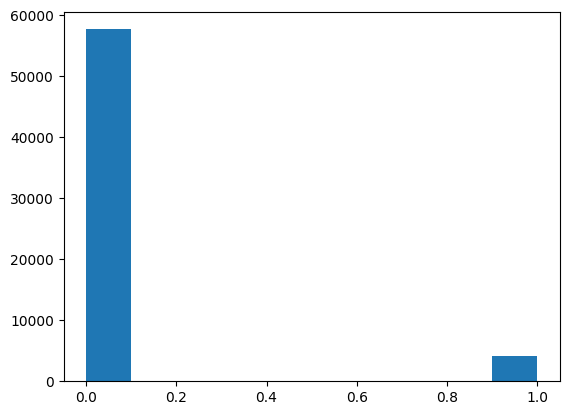

In [39]:
# do a EDA on the data
# plot the distribution of the target variable
plt.hist(train_data["Severe_crimes"])

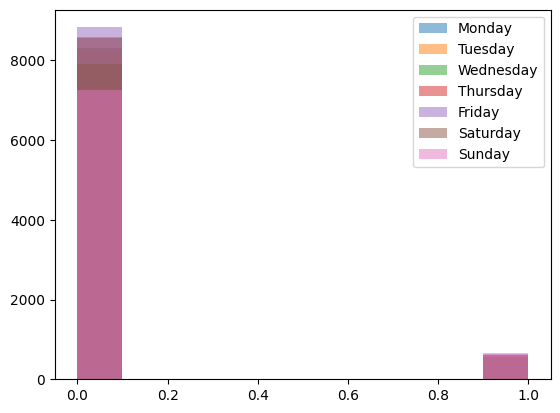

In [42]:
# more EDA
# plot the distribution of the target variable by day of the week
plt.hist(train_data[train_data["DAY_OF_WEEK"] == "Monday"]["Severe_crimes"], alpha=0.5, label="Monday")
plt.hist(train_data[train_data["DAY_OF_WEEK"] == "Tuesday"]["Severe_crimes"], alpha=0.5, label="Tuesday")
plt.hist(train_data[train_data["DAY_OF_WEEK"] == "Wednesday"]["Severe_crimes"], alpha=0.5, label="Wednesday")
plt.hist(train_data[train_data["DAY_OF_WEEK"] == "Thursday"]["Severe_crimes"], alpha=0.5, label="Thursday")
plt.hist(train_data[train_data["DAY_OF_WEEK"] == "Friday"]["Severe_crimes"], alpha=0.5, label="Friday")
plt.hist(train_data[train_data["DAY_OF_WEEK"] == "Saturday"]["Severe_crimes"], alpha=0.5, label="Saturday")
plt.hist(train_data[train_data["DAY_OF_WEEK"] == "Sunday"]["Severe_crimes"], alpha=0.5, label="Sunday")
plt.legend()
plt.show()




In [43]:
# print all the column names
print(train_data.columns)

Index(['_id', 'OFFENSE_CODE', 'OFFENSE_DESCRIPTION', 'DISTRICT',
       'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH',
       'DAY_OF_WEEK', 'HOUR', 'STREET', 'Severe_crimes'],
      dtype='object')


In [44]:
# more EDA
# analyze the relationship between the target variable and district
districts = train_data["DISTRICT"].unique()
for district in districts:
    print(district)
    print(train_data[train_data["DISTRICT"] == district]["Severe_crimes"].value_counts())

# more EDA


D4
Severe_crimes
0    7710
1     575
Name: count, dtype: int64
A1
Severe_crimes
0    6956
1     656
Name: count, dtype: int64
B2
Severe_crimes
0    7501
1     638
Name: count, dtype: int64
E5
Severe_crimes
0    2864
1     113
Name: count, dtype: int64
E13
Severe_crimes
0    3571
1     204
Name: count, dtype: int64
C6
Severe_crimes
0    4856
1     392
Name: count, dtype: int64
E18
Severe_crimes
0    3200
1     182
Name: count, dtype: int64
D14
Severe_crimes
0    4271
1     220
Name: count, dtype: int64
B3
Severe_crimes
0    5852
1     473
Name: count, dtype: int64
C11
Severe_crimes
0    6715
1     484
Name: count, dtype: int64
A7
Severe_crimes
0    3097
1     179
Name: count, dtype: int64
A15
Severe_crimes
0    1054
1      47
Name: count, dtype: int64
External
Severe_crimes
0    61
1     5
Name: count, dtype: int64
Outside of
Severe_crimes
0    1
Name: count, dtype: int64


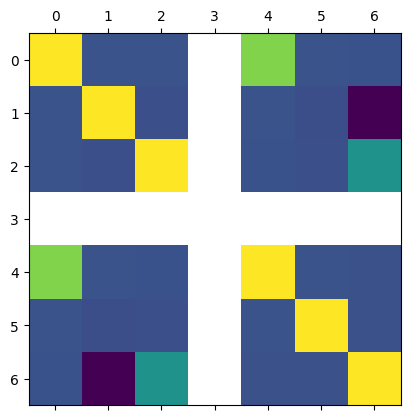

In [51]:
# draw a correlation matrix for the data
# draw all column names that are not strings

# get the columns that are numbers
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = train_data.select_dtypes(include=numerics).columns
# draw the correlation matrix
correlation_matrix = train_data[numeric_columns].corr()
plt.matshow(correlation_matrix)
plt.show()



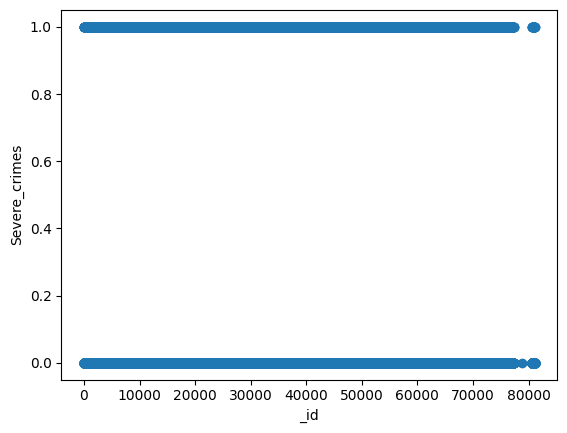

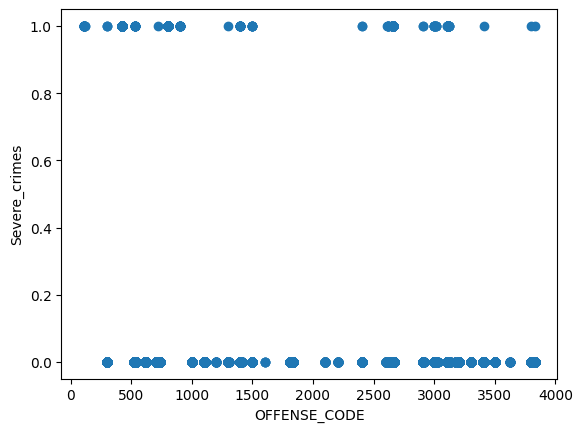

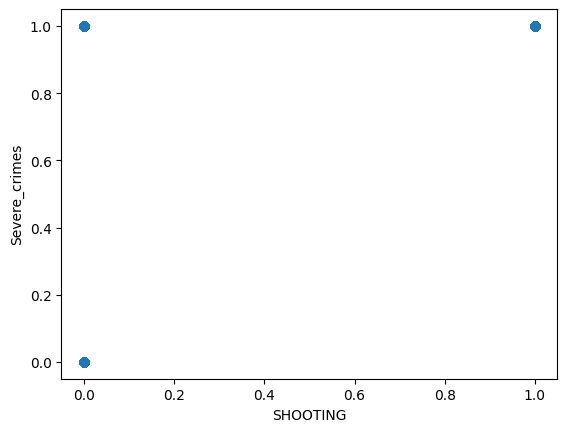

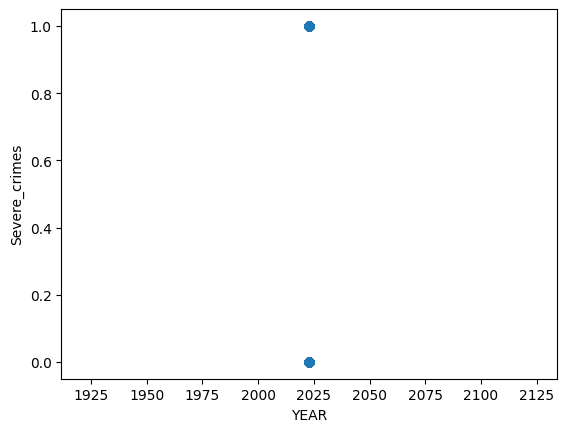

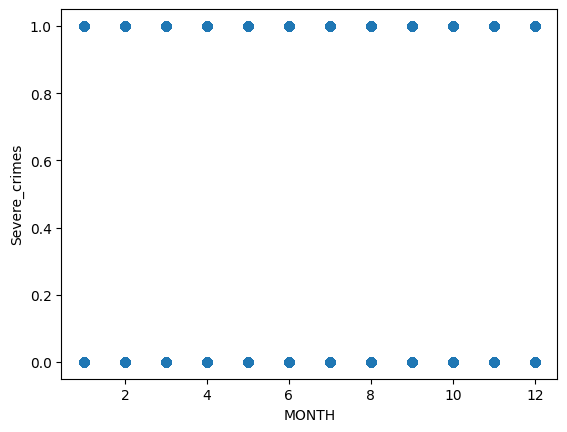

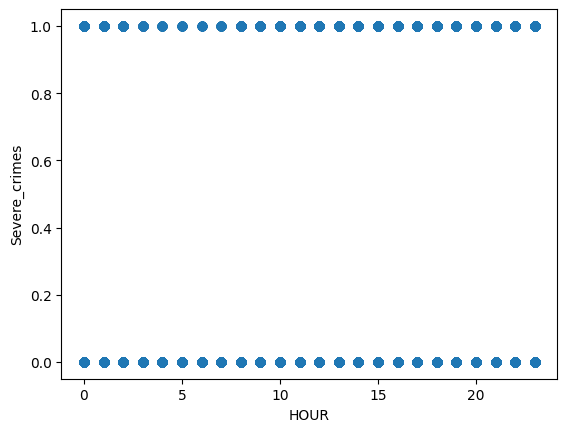

In [52]:
# Bivariate analysis of the data
# plot the relationship between the target variable and the other variables
# plot the relationship between the target variable and the district
for column in numeric_columns:
    if column != "Severe_crimes":
        plt.scatter(train_data[column], train_data["Severe_crimes"])
        plt.xlabel(column)
        plt.ylabel("Severe_crimes")
        plt.show()

        